## Introducción a PyTorch

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import clear_output

El objetivo de esta práctica es obtener una primera aproximación a PyTorch a través del entrenamiento de un modelo convolucional. Con las herramientas aquí presentadas es posible comenzar a trabajar con PyTorch, expandiendo lo aquí introducido a través de los múltiples recursos disponibles en Internet.

### Tensors

La unidad de trabajo básica en PyTorch son los **tensors**. Estos son muy similares a los arrays de NumPy, con la única diferencia de que los tensors se pueden ejecutar fuera una CPU, por ejemplo en GPUs o TPUs. Estos se pueden crear de muchas formas distintas.

In [2]:
# A partir de un array de NumPy
data_np = np.random.randn(10, 10)
data = torch.tensor(data_np)
print(data)

tensor([[-1.5843e-01,  2.1687e-01,  5.4810e-01, -1.9873e+00,  5.9781e-02,
          6.7619e-01,  4.5398e-01,  3.5554e-01, -2.1393e+00,  7.3652e-01],
        [-4.1148e-01,  3.9980e-01,  1.7917e+00, -4.1026e-01, -8.7910e-01,
         -9.5576e-01, -2.5498e-01,  5.5537e-01,  5.3280e-01,  1.4668e+00],
        [-1.0284e+00,  1.2391e+00, -5.0493e-01,  1.1141e+00, -5.5285e-02,
         -7.1691e-01, -2.0328e-01, -4.4085e-01,  1.5077e-01,  1.0772e+00],
        [ 1.7726e-01, -2.2778e+00, -7.4089e-01,  6.8870e-01, -9.8955e-01,
          6.0419e-01, -2.4854e+00, -7.2781e-01,  3.5540e-01,  7.8178e-01],
        [-1.3551e+00, -9.4664e-01,  2.2019e+00, -8.9882e-01, -3.4912e-01,
          1.1478e+00,  2.0875e-01,  1.1815e+00, -3.9458e-01, -4.3864e-01],
        [-6.0434e-01,  2.7304e-01,  6.1525e-01, -7.5764e-01,  1.3842e+00,
         -5.8376e-01,  1.0054e-01,  7.8292e-01, -6.4873e-01,  5.3254e-01],
        [ 4.6116e-02,  6.8784e-01,  2.4623e+00, -1.7488e+00,  8.4139e-01,
         -5.8663e-01, -5.7921e-0

In [3]:
# A partir de funciones de PyTorch
data_rand = torch.rand_like(data)
print(data_rand.shape)

data_zeros = torch.zeros(data_rand.shape)
print(data_zeros.shape)

data_empty = torch.empty((1000, 1000))
print(data_empty.shape)

torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([1000, 1000])


Al igual que NumPy estos tensors pueden ser multidimensionales, para, por ejemplo, almacenar imágenes

In [4]:
data_image = torch.empty((50000, 32, 32, 3))
print(data_image.shape)

torch.Size([50000, 32, 32, 3])


Los tensors se pueden volver a llevar a NumPy de forma muy sencilla

In [5]:
data_image_np = data_image.numpy()
isinstance(data_image_np, np.ndarray)

True

Los tensors tienen tres atributos principales:

- `shape`: Dimensión del tensor
- `dtype`: Tipo de los datos que contiene (e.g., `torch.float16` o `torch.float32`)
- `device`: El dispositivo (hardware) en el que el tensor está cargado (e.g., CPU o GPU)

In [6]:
data = torch.randn(100, 100)
print(f'Shape of tensor: {data.shape}')
print(f'Dtype of tensor: {data.dtype}')
print(f'Tensor is stored on: {data.device}')

Shape of tensor: torch.Size([100, 100])
Dtype of tensor: torch.float32
Tensor is stored on: cpu


Los atributos `dtype` y `device` juegan un papel fundamental a la hora de desarrollar modelos de deep learning:

- El tipo del dato influye directamente en su peso en memoria (e.g., `torch.float16` vs `torch.float32`). Dada la limitada memoria de las GPUs, hoy día se utilizan técnicas que, o bien combinan distintas precisiones o directamente entrenan en datos con precisiones muy bajas (e.g., `torch.intX`).
- El `device` en el que un tensor está cargado determina donde se van a ejecutar las operaciones asociadas a este. Cuando entrenamos modelos en GPUs necesitamos mover los datos (y el modelo) a la memoria de la GPU.

In [7]:
# Carga un tensor a la memoria de la GPU (o CPU si esta no está disponible)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

data = torch.randn(100, 100)
data.to(device)
print(data.device)

cpu


Cuando entrenamos un modelo en una GPU es necesario volver a mover los datos a la CPU para hacer operaciones con ellos

In [ ]:
# Para esto hace falta tener acceso a una GPU
data = torch.randn(3, 3, device='cuda')
data_cpu = data.to('cpu').numpy()

Los tensors de PyTorch aceptan el indexing y slicing de la misma forma que los arrays de NumPy, por lo que, si ya habeis trabajado con NumPy, pasar a PyTorch es muy directo

In [9]:
data = torch.randn(10, 10)
print(data)

tensor([[-0.1757,  1.3705,  0.3677, -0.0035,  0.5169, -0.2027,  1.3148, -0.2680,
         -0.8054, -0.1629],
        [-0.6832, -0.9335, -1.5996,  0.5221,  0.9280, -0.2110,  0.1146, -0.5368,
         -1.8052, -0.7372],
        [-1.4344, -0.3435,  0.0795, -0.8519, -0.8573, -0.2899, -0.1124, -0.2402,
          0.3528, -1.2859],
        [-1.2974,  0.7305,  0.3351, -0.4864, -0.4467,  0.7829, -0.9307, -0.6555,
          1.1974,  0.0751],
        [ 0.6365,  0.5786, -1.2255, -0.2544,  0.0871, -0.8011,  0.3598,  0.2085,
         -1.0207, -0.6176],
        [ 0.4563,  0.0808,  1.3497, -0.7603,  0.7514,  0.5409,  1.5934, -1.0745,
         -0.7245, -0.4698],
        [ 0.3391, -2.0140,  0.4994,  0.4747,  0.6311,  0.3122,  0.0458,  1.8412,
         -0.4427, -0.4514],
        [ 0.9718, -1.6312, -1.0525, -0.6982,  0.9496,  0.3128, -1.1852,  1.1909,
          0.3156, -0.4167],
        [-1.2181,  0.7417, -2.5289, -1.6919, -1.5839,  0.0242, -0.5853,  0.2623,
          0.6430, -0.6644],
        [-1.7631,  

In [10]:
data[:, 0]

tensor([-0.1757, -0.6832, -1.4344, -1.2974,  0.6365,  0.4563,  0.3391,  0.9718,
        -1.2181, -1.7631])

In [11]:
data[5, 5]

tensor(0.5409)

PyTorch implementa una gran variedad de operaciones aritméticas, las cuales utiliza como base para implementar operaciones más complejas (e.g., convoluciones o self-attention). Al construir modelos con estas operaciones, cuando el grafo de computación se calcula (de forma dinámica), el cálculo de los gradientes que utilizamos para, por ejemplo, entrenar el modelo, se definen de forma automática (**automatic differentiation**). Podeis encontrar más información sobre estas operaciones en la [documentación oficial](https://pytorch.org/docs/stable/torch.html).

In [12]:
# Seno y coseno
vector = torch.tensor([torch.pi /2, 3/2 * torch.pi])
torch.sin(vector)
torch.cos(vector)

tensor([-4.3711e-08,  1.1925e-08])

In [13]:
# Multiplicación de matrices
x1, x2 = torch.randn(20, 10), torch.randn(10, 20)
result = x1.matmul(x2)
print(result.shape)

torch.Size([20, 20])


In [14]:
# Multiplicacion de matrices element-wise
x1, x2 = torch.randn(20, 20), torch.randn(20, 20)
result = x1.mul(x2)
print(result.shape)

torch.Size([20, 20])


### Datasets y DataLoaders

Para entender cómo hay que preparar los datos para PyTorch vamos a cargar los datos de la práctica evaluable de *convoluciones y capas residuales*. Estos datos se pueden descargar de:

https://drive.google.com/drive/folders/1XnzY8hKWxifR65XFB3ErI_WZMLzzdR_n?usp=sharing

In [15]:
x_data = np.load('weatherbench_predictors.npy')
y_data = np.load('weatherbench_predictand.npy')
print(f'X shape: {x_data.shape} | Y shape: {y_data.shape}')

X shape: (14610, 32, 64, 6) | Y shape: (14610, 32, 64, 1)


Por defecto, PyTorch considera que la segunda dimensión del array con los datos indica la variable/channel. Por ello conviene hacer un reshape de los datos:

In [16]:
x_data = np.transpose(x_data, (0, 3, 1, 2))
y_data = np.transpose(y_data, (0, 3, 1, 2))

Dividimos los datos en train y test

In [17]:
indices = np.random.permutation(len(x_data))
split_idx = int(0.8 * len(x_data))

train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

x_train, y_train = x_data[train_indices, :], y_data[train_indices, :]
x_test, y_test = x_data[test_indices, :], y_data[test_indices, :]

En PyTorch, los `Datasets` son abstracciones de los datos que vamos a utilizar para entrenar a un modelo. Se generan creando una subclase a partir de `torch.utils.data.Dataset` y deben implementar como mínimo tres métodos:

- `__init__`: Inicializa/carga los datos que van a formar parte del dataset 
- `__len__`: Devuelve el número de muestras en el dataset
- `__getitem__`: Dado un índice devuelve la correspondiente muestra dentro del dataset

Por ejemplo, podemos construir un dataset con los datos de la práctica

In [18]:
# Definimos el dataset
class WeatherbenchDataset(Dataset):
    def __init__(self, x_data, y_data, transform=None):
        self.transform = transform
        if not isinstance(x_data, torch.Tensor):
            x_data = torch.tensor(x_data)
        if not isinstance(x_data, torch.Tensor):
            y_data = torch.tensor(y_data)
        self.x_data, self.y_data = x_data, y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x_sample, y_sample = self.x_data[idx, :], self.y_data[idx, :]

        if self.transform:
            x_sample = self.transform(x_sample)
        return x_sample, y_sample

In [19]:
# Inicializamos el dataset
weatherbench_train_dataset = WeatherbenchDataset(x_data=x_train, y_data=y_train)
print(f'Numero de elementos en el dataset: {len(weatherbench_train_dataset)}')

Numero de elementos en el dataset: 11688


Podemos acceder a los elementos de este dataset a través de los índices

In [20]:
idx = 100
x_sample, y_sample = weatherbench_train_dataset[idx]
print(f'Dimension de la x: {x_sample.shape} | Dimension de la y: {y_sample.shape}')

Dimension de la x: torch.Size([6, 32, 64]) | Dimension de la y: (1, 32, 64)


A la hora de definir/inicializar los datasets es posible relacionarlos con operaciones de preprocesado. Por ejemplo, al inicializar el dataset, es posible normalizar los predictores de forma que cuando obtengamos muestras de él, estas ya estén preparadas para pasarselas al modelo de deep learning

In [21]:
# Calculamos las medias y desviaciones a usar para la estandarización
predictors_train_mean = np.mean(x_train, axis=(0, 2, 3))
predictors_train_std = np.std(x_train, axis=(0, 2, 3))

# Definimos las transformaciones
dataset_transforms = transforms.Compose([transforms.Normalize(mean=predictors_train_mean,
                                                              std=predictors_train_std)])

# Inicializamos el dataset
weatherbench_train_dataset = WeatherbenchDataset(x_data=x_train, y_data=y_train,
                                                 transform=dataset_transforms)

In [22]:
idx = 100
x_sample, y_sample = weatherbench_train_dataset[idx]

Una vez tenemos nuestros datos contenidos en un `Dataset`, debemos definir el `DataLoader`. Este objeto nos permitirá iterar sobre nuestro dataset, creando batches de forma rápida y, si se desea, en paralelo.

In [23]:
dataloader_train = DataLoader(dataset=weatherbench_train_dataset,
                              batch_size=32, shuffle=True,
                              num_workers=2)

In [24]:
for idx, (batch_x_data, batch_y_data) in enumerate(dataloader_train):
    print(f'Batch {idx}')
    print(f'Dimension de la X: {batch_x_data.shape}')
    print(f'Dimension de la Y: {batch_y_data.shape}')
    break

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/claudiavello/.pyenv/versions/3.12.3/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/claudiavello/.pyenv/versions/3.12.3/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'WeatherbenchDataset' on <module '__main__' (<class '_frozen_importlib.BuiltinImporter'>)>


KeyboardInterrupt: 

### Definición del modelo

Una vez tenemos nuestros datos preparados, podemos empezar a definir el modelo de deep learning que vamos a entrenar sobre ellos. En PyTorch los modelos se suelen definir dentro de su propia clase, la cual es una subclase de `nn.Module`. Un modelo concreto está formado por módulos (e.g., capas convolucionales, funciones de activación, capas fully-connected, etc.) y estos, a su vez, por otros modulos más simples (e.g., sumas, productos de matrices, etc.). Estas clases necesitan tener, por lo menos, dos métodos:

- `__init__`: Definelas capas (módulos) y parámetros que van a formar parte de la arquitectura del modelo.
- `forward`: Define el conjunto de operaciones que forman el *forward pass* del modelo. En base a las operaciones que definamos aquí, `torch.autograd` calculará los gradientes de forma automática.

A fin de visualizar el proceso de construcción de modelos, vamos a construir un modelo convolucional similar a algunos de los hechos en la práctica de convoluciones en clase

In [ ]:
class ConvolutionalModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ConvolutionalModel, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_filters = [8, 16, 32]

        # Primer bloque
        self.conv_1 = nn.Conv2d(in_channels=self.input_dim[0], out_channels=self.num_filters[0],
                                kernel_size=3, padding='same')
        self.bn_1 = nn.BatchNorm2d(num_features=self.num_filters[0])

        # Segundo bloque
        self.conv_2 = nn.Conv2d(in_channels=self.num_filters[0], out_channels=self.num_filters[1],
                                kernel_size=3, padding='same')
        self.bn_2 = nn.BatchNorm2d(num_features=self.num_filters[1])

        # Tercer bloque
        self.conv_3 = nn.Conv2d(in_channels=self.num_filters[1], out_channels=self.num_filters[2],
                                kernel_size=3, padding='same')
        self.bn_3 = nn.BatchNorm2d(num_features=self.num_filters[2])

        # Bloque final
        self.conv_4 = nn.Conv2d(in_channels=self.num_filters[2], out_channels=1,
                                kernel_size=1, padding='same')

    def forward(self, x):

        x = self.conv_1(x)
        x = self.bn_1(x)

        x = self.conv_2(x)
        x = self.bn_2(x)

        x = self.conv_3(x)
        x = self.bn_3(x)

        out = self.conv_4(x)
        return out

In [ ]:
# Inicializamos el modelo
input_dim, output_dim = x_train.shape[1:], y_train.shape[1:]
model = ConvolutionalModel(input_dim=input_dim,
                           output_dim=output_dim)
print(model)

ConvolutionalModel(
  (conv_1): Conv2d(6, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn_1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn_2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn_3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(32, 1, kernel_size=(1, 1), stride=(1, 1), padding=same)
)


El modelo ya esta definido e inicializado. De hecho, si le pasamos datos de entrada, el modelo les procesará (utilizando `model.forward()`) y nos devolverá la salida

In [26]:
for idx, (batch_x_data, batch_y_data) in enumerate(dataloader_train):
    print(f'Batch {idx}')
    print(f'Dimension de la X: {batch_x_data.shape}')
    print(f'Dimension de la Y: {batch_y_data.shape}')
    model_prediction = model(batch_x_data)
    print(f'Dimension de la predicción del modelo: {model_prediction.shape}')
    break

Batch 0
Dimension de la X: torch.Size([32, 6, 32, 64])
Dimension de la Y: torch.Size([32, 1, 32, 64])
Dimension de la predicción del modelo: torch.Size([32, 1, 32, 64])


### Entrenamiento del modelo

Ya tenemos el modelo construido, sin embargo los pesos están asignados de forma aleatoria, necesitamos entrenarlo. PyTorch ofrece la posibilidad de controlar totalmente el proceso de entrenamiento. De hecho, tenemos que ser nosotros los que definamos las iteraciones del modelo a través de los batches, el cálculo de los *forward* y *backward passes* y la actualización de los pesos. Esto, aunque en un principio puede parecer complicado, es bastante sencillo y proveé al usuario de un gran control sobre el entrenamiento del modelo.

Dado que estamos ante un problema de regresión, como función de coste vamos a utilizar el Mean Squared Error (MSE). PyTorch ofrece una gran lista de [funciones de coste](https://pytorch.org/docs/stable/nn.html#loss-functions) a utilizar, en este caso nosotros seleccionaremos `nn.MSELoss`. A la hora de entrenar el modelo, estas funciones de coste tomarán como entrada un `input` y un `target` sobre los que se aplicarán la correspondiente función. Sobre la salida de esta función se calcularán los gradientes a utilizar para actualizar los pesos del modelo.

In [27]:
loss_function = nn.MSELoss()

También vamos a necesitar definir el optimizador. Este objeto va a dictar como se actualizan los pesos del modelo en base a los gradientes que calculemos en cada batch. Nosotros vamos a utilizar el **Stochastic Gradient Descent (SGD)**. En PyTorch este se define de la siguiente manera:

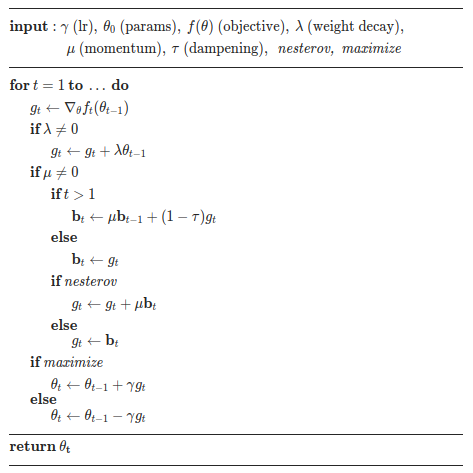

Nosotros nos vamos a limitar a la versión más sencilla, necesitando solo definir el **learning rate** a utilizar durante el entrenamiento.

In [28]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Además el modelo le vamos a entrenar por un número de epochs concreto

In [29]:
num_epochs = 10

Con todos los ingredientes ya definidos, podemos continuar con el entrenamiento del modelo. El proceso, a grandes rasgos, será el siguiente:

- Iteramos sobre el número de epochs
    - Iteramos sobre los batches creados por el `DataLoader` sobre el `Dataset` a utilizar para entrenar el modelo
        - Calculamos el *forward pass* para obtener la predicción del modelo
        - Calculamos el valor de la función de coste
        - A través del *backward pass* (backpropagation) calculamos los gradientes de la función de coste con respecto a los pesos del modelo
        - Actualizamos los pesos del modelo utilizando los gradientes y el algoritmo de optimización  

In [30]:
# Inicializamos una lista para guardar la loss por epoch
loss_train = []

# Iteramos sobre las epochs
for epoch in range(num_epochs):
    print(f'Epoch {epoch}/{num_epochs}...')
    # Definimos una variable para acumular el valor de la función de coste por epoch
    epoch_loss = 0.0 
    # Iteramos sobre los batches
    for idx, (batch_x_data, batch_y_data) in enumerate(dataloader_train):
        batch_size = batch_x_data.shape[0]
        
        # Hacemos cero los gradientes ya que por defecto estos se acumulan
        optimizer.zero_grad()

        # Calculamos el forward pass
        outputs = model(batch_x_data) # Por debajo PyTorch llama a model.forward()

        # Calculamos la función de coste
        loss_batch = loss_function(outputs, batch_y_data)
        epoch_loss += batch_size * loss_batch.item()

        # Calculamos los gradientes (backward pass)
        loss_batch.backward()

        # Actualizamos los pesos del modelo
        optimizer.step()

    # Calulamos la loss para la epoch
    epoch_loss = epoch_loss / len(weatherbench_train_dataset)
    loss_train.append(epoch_loss)
    print(f'Loss function: {epoch_loss}')
    print('')

# Al finalizar el entrenamiento guardamos el modelo (solo los pesos)
model_name = 'model.pt'
torch.save(model.state_dict(), model_name)

Epoch 0/10...
Loss function: 1675.3063647500626

Epoch 1/10...
Loss function: 30.188888233871513

Epoch 2/10...
Loss function: 28.386272181067707

Epoch 3/10...
Loss function: 27.39544765334028

Epoch 4/10...
Loss function: 26.722776915584827

Epoch 5/10...
Loss function: 26.291310334515686

Epoch 6/10...
Loss function: 26.066365941104458

Epoch 7/10...
Loss function: 25.908114026622524

Epoch 8/10...
Loss function: 25.80365493769192

Epoch 9/10...
Loss function: 25.75842179279471



### Inferencia

Los modelos entrenados se pueden cargar en otro momento y hacer predicciones con ellos (o incluso retomar el entrenamiento). Para ello, primero inicializamos el modelo y después le asignamos los pesos que hemos guardado durante el entrenamiento con `torch.save()`

In [31]:
model = ConvolutionalModel(input_dim=input_dim,
                           output_dim=output_dim)
model.load_state_dict(torch.load(model_name))

<All keys matched successfully>

En PyTorch es importante indicar al modelo que estamos en modo inferencia a través de `model.eval()`. Esto se debe a que algunas capas no funcionan de la misma manera en el entrenamiento que en la inferencia (e.g., Dropout o Batch Normalization).

In [32]:
model = model.eval()

Para generar las predicciones basta con correr el `model()` sobre los datos a predecir. También podemos, de forma similar que para el entrenamiento, iterar sobre un `Dataset` con el `DataLoader`.

In [33]:
weatherbench_test_dataset = WeatherbenchDataset(x_data=x_test, y_data=y_test,
                                                transform=dataset_transforms)

dataloader_test = DataLoader(dataset=weatherbench_test_dataset,
                             batch_size=32, shuffle=False, num_workers=2)

print(f'Número de muestras en el periodo de test: {len(weatherbench_test_dataset)}')

Número de muestras en el periodo de test: 2922


E iterar sobre ellas:

In [34]:
y_test_pred = []

with torch.no_grad(): # Evita el calculo de gradientes, para la evaluación no les necesitamos
    for batch_x_data, batch_y_data in dataloader_test:
        pred = model(batch_x_data).numpy()
        y_test_pred.append(pred)
        
y_test_pred = np.concatenate(y_test_pred)

### Personalización del entrenamiento

Definir todo el proceso de entrenamiento nos da mucha flexibilidad para hacer un seguimiento de aspectos muy específicos de nuestro modelo (e.g., debug). Por ejemplo, a continuación vamos a modificar el bucle de entrenamiento previo para visualizar la distribución de los pesos y los gradientes de la primera capa convolucional.

In [48]:
# Initialize model
input_dim, output_dim = x_train.shape[1:], y_train.shape[1:]
model = ConvolutionalModel(input_dim=input_dim,
                           output_dim=output_dim)

# Set hyerparameters
loss_function = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 5

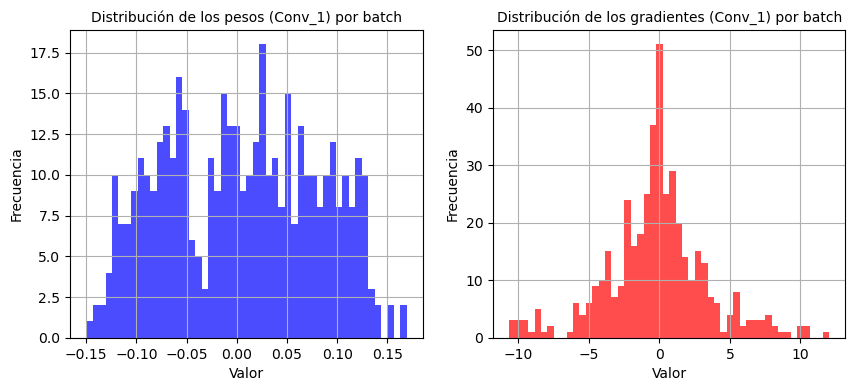

In [49]:
%matplotlib inline

# Iteramos sobre las epochs
for epoch in range(num_epochs):
    # Definimos una variable para acumular el valor de la función de coste por epoch
    epoch_loss = 0.0 
    # Iteramos sobre los batches
    for idx, (batch_x_data, batch_y_data) in enumerate(dataloader_train):
        batch_size = batch_x_data.shape[0]
        
        # Hacemos cero los gradientes ya que por defecto estos se acumulan
        optimizer.zero_grad()

        # Calculamos el forward pass
        outputs = model(batch_x_data) # Por debajo PyTorch llama a model.forward()

        # Calculamos la función de coste
        loss_batch = loss_function(outputs, batch_y_data)
        epoch_loss += batch_size * loss_batch.item()

        # Calculamos los gradientes (backward pass)
        loss_batch.backward()

        # Actualizamos los pesos del modelo
        optimizer.step()

        # Dibujamos la distribución de los pesos y los gradientes para la conv_1
        weights = model.conv_1.weight.data.cpu().numpy().flatten()
        grads = model.conv_1.weight.grad.data.cpu().numpy().flatten()

        clear_output(wait=True)
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))

        axes[0].hist(weights, bins=50, alpha=0.7, color='blue')
        axes[0].set_title(f'Distribución de los pesos (Conv_1) por batch',
                          fontsize=10)
        axes[0].set_xlabel('Valor')
        axes[0].set_ylabel('Frecuencia')
        axes[0].grid(True)

        axes[1].hist(grads, bins=50, alpha=0.7, color='red')
        axes[1].set_title(f'Distribución de los gradientes (Conv_1) por batch',
                          fontsize=10)
        axes[1].set_xlabel('Valor')
        axes[1].set_ylabel('Frecuencia')
        axes[1].grid(True)

        plt.show()

### Propuesta de práctica

Al igual que Keras, PyTorch pone a disposición del usuario una serie de datasets a través de su propio objeto `Dataset`. Por ejemplo, para descargar CIFAR10 (un dataset que ya hemos visto en prácticas previas) y aplicarle una serie de transformaciones basta con hacer lo siguiente

In [50]:
transforms_cifar10 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010))])

dataset_cifar10 = datasets.CIFAR10(root='./cifar10', download=True, 
                                   transform=transforms_cifar10)

In [51]:
print(f'Numero de muestras en el dataset: {len(dataset_cifar10)}')

Numero de muestras en el dataset: 50000


Dados estos datos, un ejercicio interesante pasa por intentar entrenar un Variational Autoencoder (VAE) para poder generar nuevas muestras (imágenes) $\mathbf{x}$ de la distribución $P(\mathbf{X})$. Para ello necesitaríamos construir la correspondiente arquitectura y la función de pérdida:

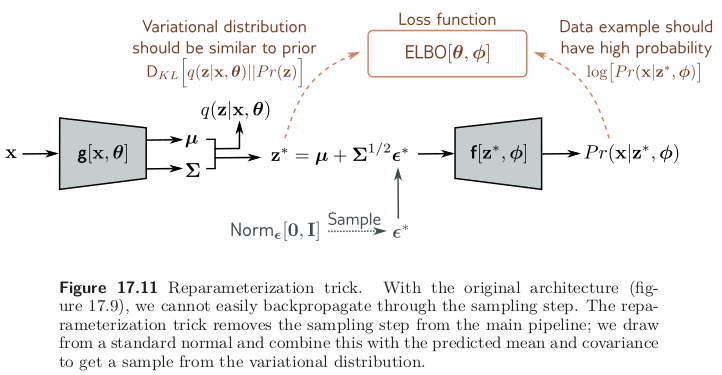

In [ ]:
# TODO